<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/mobilenetv2_1.00_160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import gdown

# Especifique o ID do arquivo e o nome do arquivo de saída
file_id = '1aX48j7lKyE0c66tMZEesOwNncFbyvu6X'
output = 'dataset.zip'

# Baixe o arquivo do Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
!unzip dataset.zip

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/dataset_3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_dir = '/content/dataset_3/train'
test_dir = '/content/dataset_3/test'
val_dir = '/content/dataset_3/validation'

In [4]:
batch_size = 32
image_size = 160

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [5]:
class_name = train_data.class_names
print(class_name)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


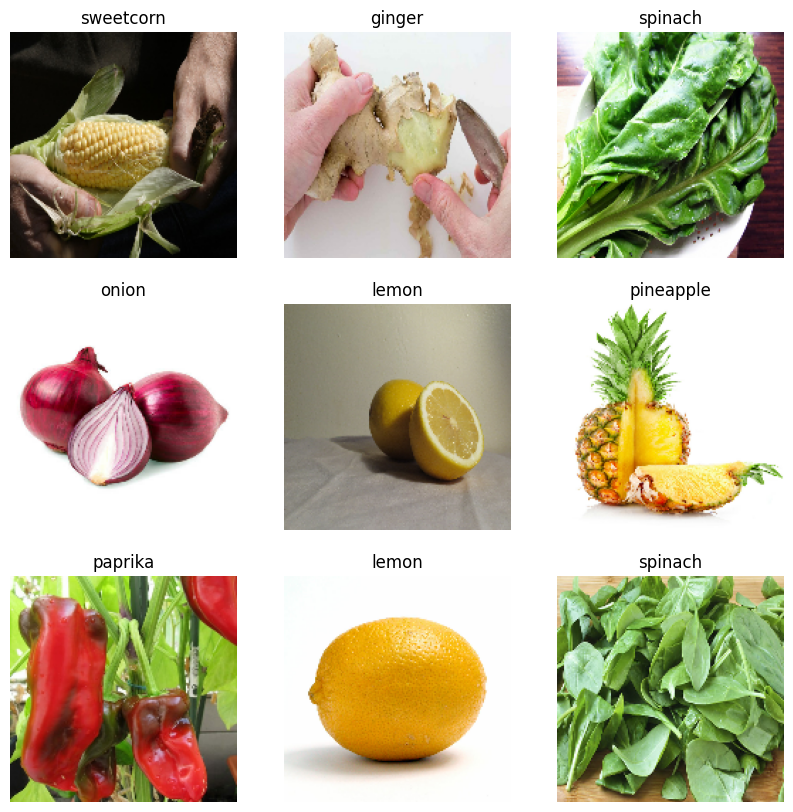

In [6]:
plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[labels[i]])
    plt.axis('off')

In [7]:
for image_batch, label_batch in train_data:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 160, 160, 3)
(32,)


In [8]:
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 242.0


In [9]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [10]:
train = train_data.map(format)
validation = val_data.map(format)

In [11]:
for format_image_batch, format_label_batch in train:
  print(format_image_batch.shape)
  print(format_label_batch.shape)
  break

(32, 160, 160, 3)
(32,)


In [12]:
format_first_image = format_image_batch[0]
print(np.min(format_first_image), np.max(format_first_image))

0.0 1.0


In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (image_size, image_size, 3),
                                               include_top = False,
                                               weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [14]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
(32, 1280)

(32, 1280)


(32, 1280)

In [17]:
prediction_layer = keras.layers.Dense(36)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 36)


In [18]:
model = tf.keras.Sequential([
        base_model,
        global_average_layer,
        prediction_layer
])

In [19]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#https://www.kaggle.com/code/jominjae/cnn-fruit-vegetable-classification
history = model.fit(train,
                    epochs=20,
                    validation_data=validation)

Epoch 1/20
98/98 [==============================] - 360s 3s/step - loss: 1.9407 - accuracy: 0.5063 - val_loss: 0.9075 - val_accuracy: 0.7407
Epoch 2/20
98/98 [==============================] - 330s 3s/step - loss: 0.6028 - accuracy: 0.8494 - val_loss: 0.6009 - val_accuracy: 0.8234
Epoch 3/20
98/98 [==============================] - 344s 3s/step - loss: 0.2813 - accuracy: 0.9326 - val_loss: 0.4699 - val_accuracy: 0.8689
Epoch 4/20
98/98 [==============================] - 339s 3s/step - loss: 0.1456 - accuracy: 0.9724 - val_loss: 0.4230 - val_accuracy: 0.8746
Epoch 5/20
98/98 [==============================] - 344s 3s/step - loss: 0.0826 - accuracy: 0.9827 - val_loss: 0.3561 - val_accuracy: 0.8974
Epoch 6/20
98/98 [==============================] - 351s 4s/step - loss: 0.0667 - accuracy: 0.9846 - val_loss: 0.3014 - val_accuracy: 0.9003
Epoch 7/20
98/98 [==============================] - 336s 3s/step - loss: 0.0581 - accuracy: 0.9849 - val_loss: 0.2906 - val_accuracy: 0.9088
Epoch 8/20
98

In [22]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

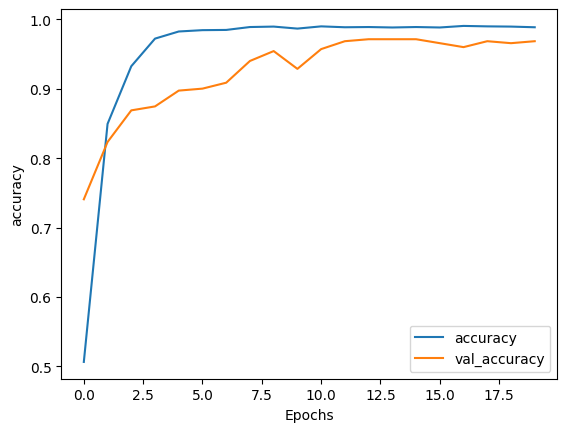

In [23]:
plot_graghs(history, 'accuracy')

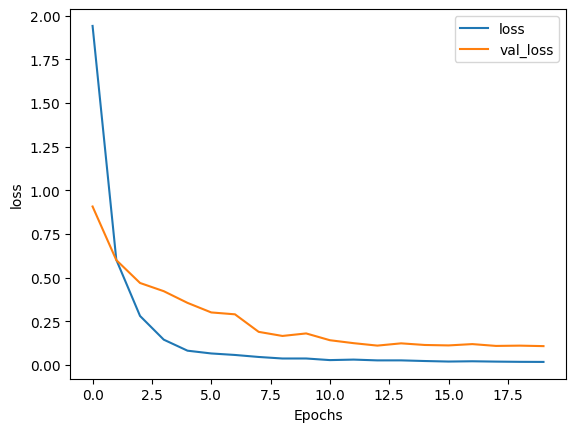

In [24]:
plot_graghs(history, 'loss')

In [25]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(image_size, image_size),
                                                                batch_size = batch_size,
                                                                shuffle=False)

Found 359 files belonging to 36 classes.


In [26]:
test = test_data.map(format)

In [27]:
result = model.evaluate(test)
print("Test loss, Test accuracy : ", result)

12/12 [==============================] - 16s 1s/step - loss: 0.1063 - accuracy: 0.9694
Test loss, Test accuracy :  [0.10628414154052734, 0.9693593382835388]


In [29]:
# Salvar o modelo
model.save('/content/MobileNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
#!pip install gTTS
import cv2
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow
from gtts import gTTS
import IPython.display as ipd

# Caminho para a imagem de teste
caminho_imagem_teste = '/content/OIP (4).jpg'  # Substitua pelo caminho da sua imagem de teste

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pela MobileNetV2
image_resized = cv2.resize(image, (224, 224))

# Adicionar a dimensão do lote (batch)
image_resized = np.expand_dims(image_resized, axis=0)

# Pré-processamento específico da MobileNetV2
image_preprocessed = preprocess_input(image_resized)

# Carregar o modelo MobileNetV2
model = MobileNetV2(weights='imagenet')

# Fazer a previsão usando o modelo MobileNetV2
predicted_label = model.predict(image_preprocessed)

# Decodificar o rótulo previsto para obter as principais previsões
predicted_labels = decode_predictions(predicted_label, top=3)[0]

# Exibir as previsões
for i, (imagenet_id, label, score) in enumerate(predicted_labels):
    print(f"Previsão {i + 1}: {label} ({score:.2f})")

# Gerar o arquivo de áudio com o nome do produto previsto
predicted_class = predicted_labels[0][1]  # Usando a previsão principal
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')


1/1 [==============================] - 1s 876ms/step
Previsão 1: banana (0.11)
Previsão 2: cucumber (0.07)
Previsão 3: spaghetti_squash (0.07)
